# Linear Regression Project

A project that analyses Ecommerce company's purchase data. this is to analyse whether the company should focus their efforts on their mobile app experience or their website. 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Reading Data

The data has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [2]:
customers = pd.read_csv('Ecommerce Customers') 

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis


Jointplot to compare the Time on Website and Yearly Amount Spent columns

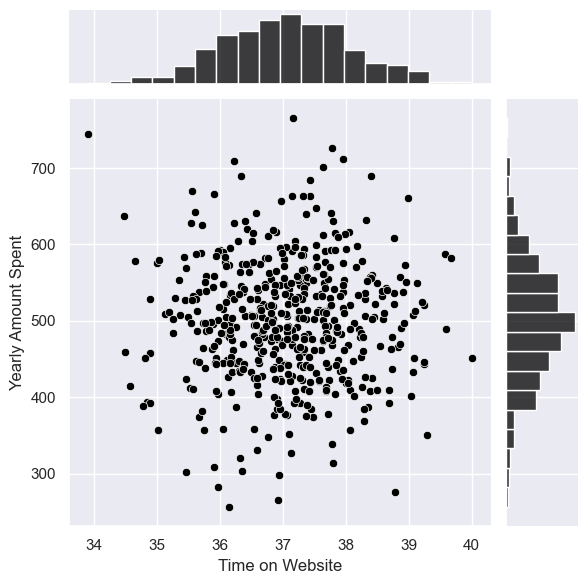

In [11]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,color='black')

With the Time on App column.

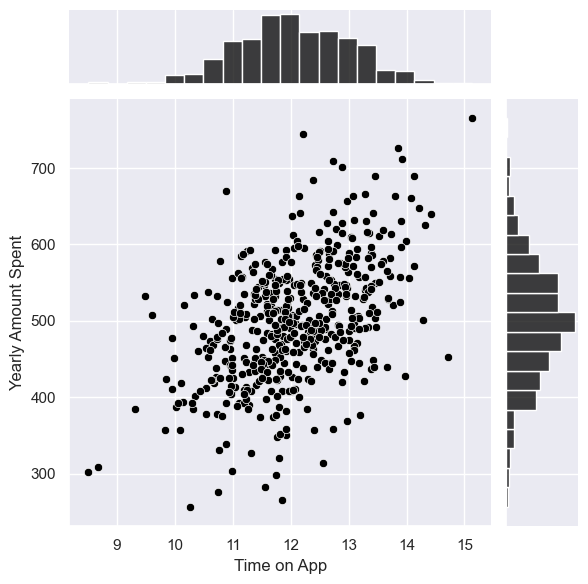

In [12]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,color='black')

Jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

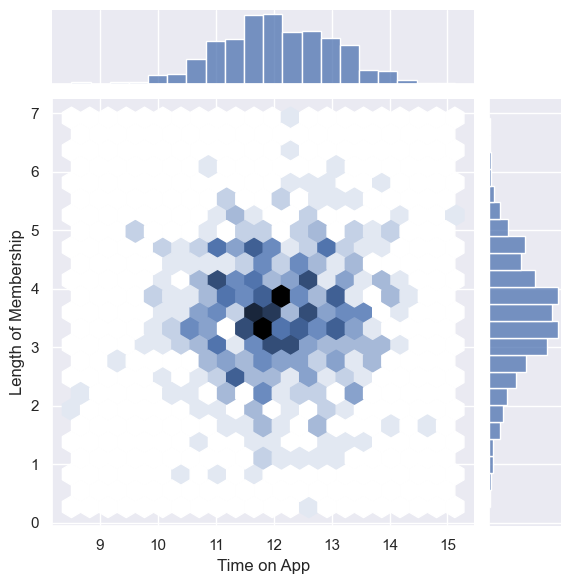

In [13]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

Exploring these types of relationships across the entire data set.

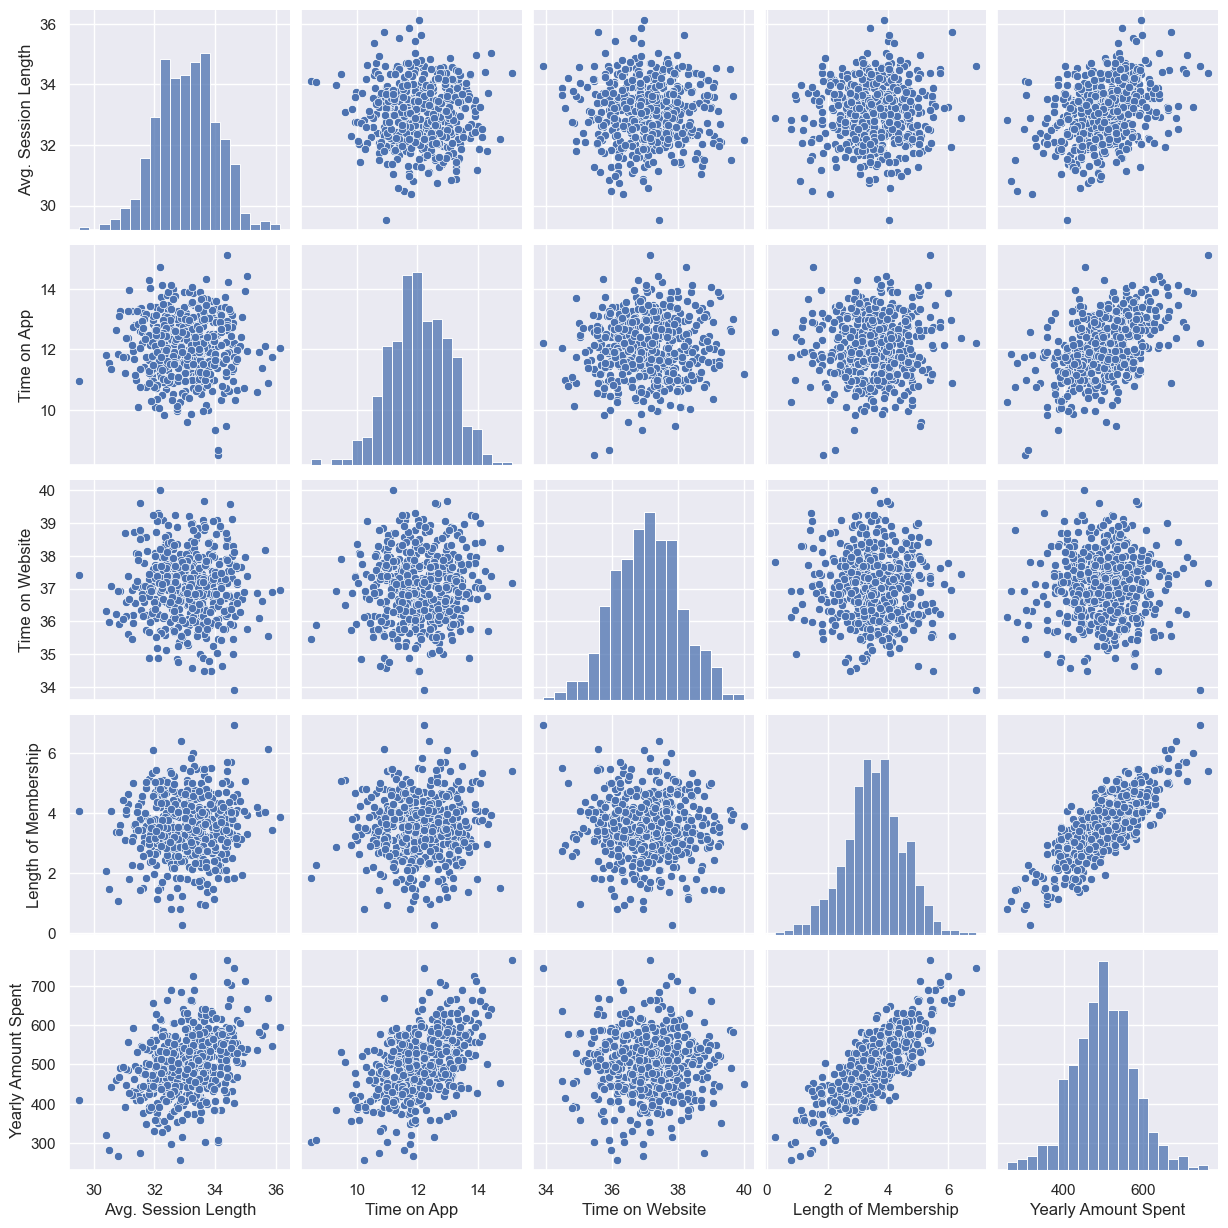

In [14]:
sns.pairplot(customers)

Length of Membership seems to be highly correlated with Yearly Amount Spent

Linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership

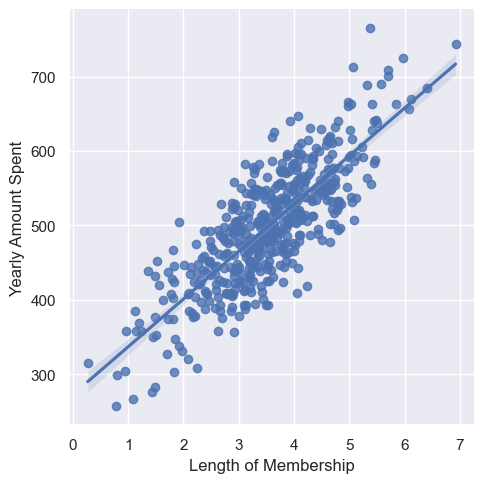

In [36]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data


In [16]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=customers[['Yearly Amount Spent']]

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()

** Train/fit lm on the training data.**

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

## Predicting Test Data

In [28]:
predictions = lm.predict(X_test)

Scatterplot of the real test values versus the predicted values. 

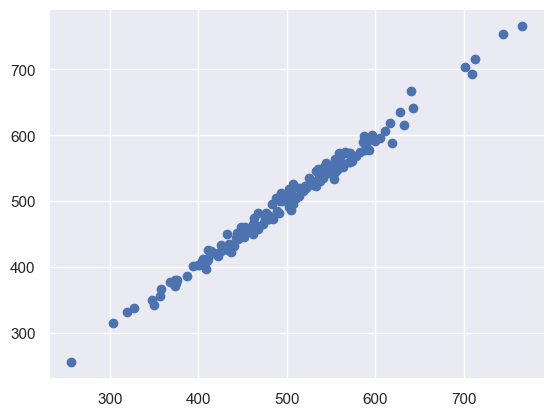

In [32]:
plt.scatter(x=y_test,y=predictions)

## Evaluating the Model


In [33]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

print(MAE)
print(MSE)
print(RMSE)

7.2281486534308295
79.8130516509744
8.933815066978632


## Residuals


Histogram of the residuals and make sure it looks normally distributed

<Axes: ylabel='Count'>

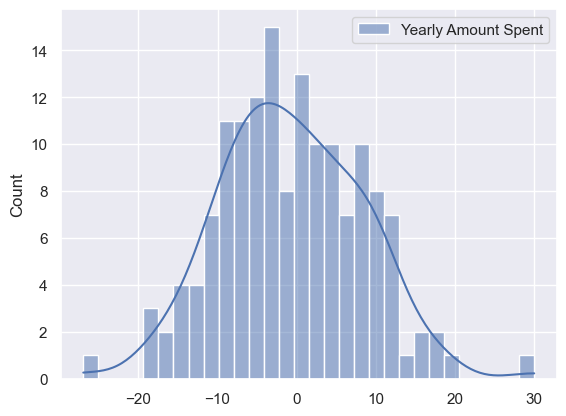

In [35]:
sns.histplot(y_test-predictions,kde=True,bins=30)

## Conclusion
To find out if we focus our efforts on mobile app or website development or maybe that doesn't even really matter, and Membership Time is what is really important:

In [42]:
co=pd.DataFrame([25.98154972, 38.59015875,  0.19040528, 61.27909654],X_train.columns,columns = ['Coefficient'])
co

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Since the App shows better results, improving the app would be better for greater sales.